In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score

In [163]:
data = load_diabetes()
X = data.data[:, [3]]   
y = data.target

In [164]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,               
    test_size=0.2,      
    random_state=42)

In [165]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(353, 1) (89, 1)
(353,) (89,)


In [166]:
dtreeReg = DecisionTreeRegressor(max_depth=3)

dtreeReg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

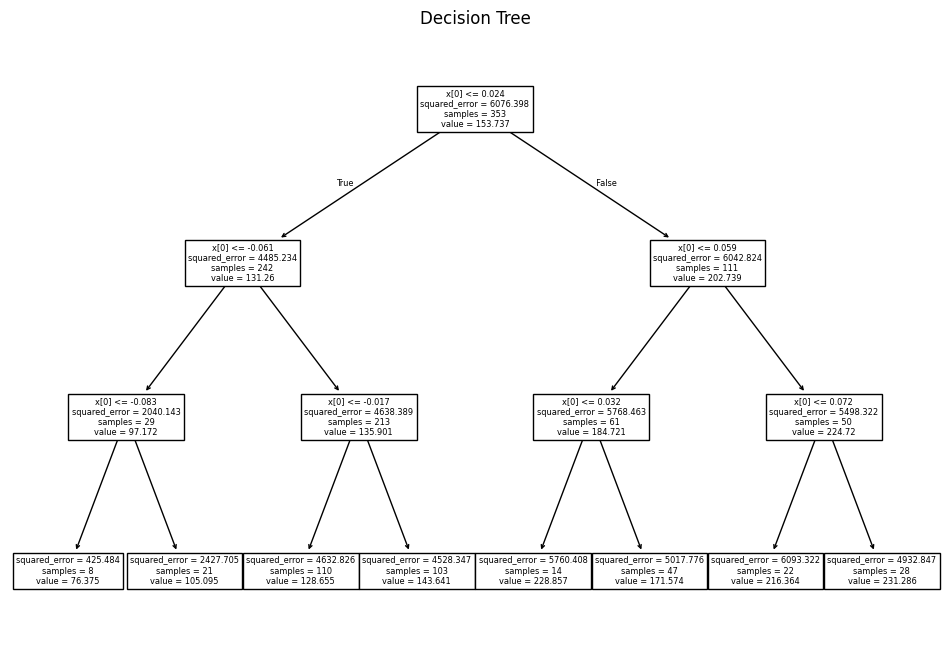

In [167]:
# Ploting decision tree
plt.figure(figsize=(12, 8))
plot_tree(dtreeReg)
plt.title("Decision Tree")
plt.show()

In [168]:
y_pred = dtreeReg.predict(X_test)

In [169]:
r2_score(y_test, y_pred)

0.10837684997528507

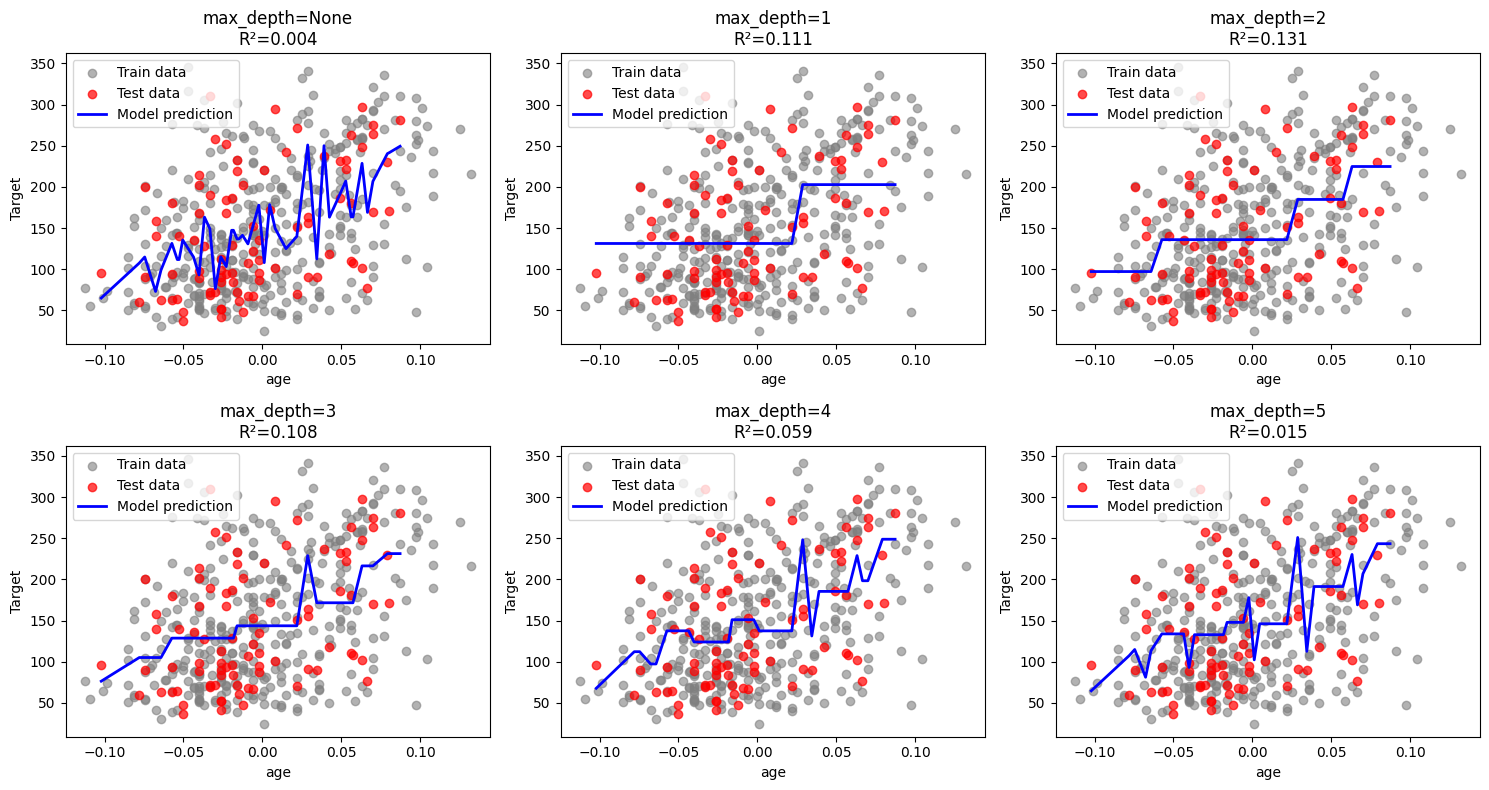

In [ ]:
def plot_regression_fit(ax, max_depth=None):
    
    reg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Sort X for smooth plotting
    sort_idx = np.argsort(X_test[:, 0])
    X_sorted = X_test[sort_idx]
    y_pred_sorted = y_pred[sort_idx]

    # Scatter real data vs model prediction curve
    ax.scatter(X_train[:, 0], y_train, color='gray', alpha=0.6, label="Train data")
    ax.scatter(X_test[:, 0], y_test, color='red', alpha=0.7, label="Test data")
    ax.plot(X_sorted[:, 0], y_pred_sorted, color='blue', linewidth=2, label="Model prediction")
    
    ax.set_xlabel(data.feature_names[0])
    ax.set_ylabel("Target")
    ax.set_title(f"max_depth={max_depth}\nR²={r2:.3f}")
    ax.legend()

# Depths to visualize
depths = [None, 1, 2, 3, 4, 5]

# Create subplot grid automatically
n_cols = 3
n_rows = int(np.ceil(len(depths) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, depth in enumerate(depths):
    plot_regression_fit(axes[i], max_depth=depth)

# Remove empty axes
for j in range(len(depths), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


From the plots, when the tree depth is too low (e.g., max_depth=1), the model is underfitting — it’s too simple and misses important patterns.
When the depth is too high (e.g., max_depth=5 or None), the model becomes overfitting, capturing noise instead of real trends.
The best performance occurs at a moderate depth (around 2), where the model generalizes well without fitting noise.